# **MODEL**

In [ ]:
from keras.layers import Conv2D, UpSampling2D, Dense, Reshape, Flatten, MaxPooling2D
from keras.models import Sequential, Model
from keras.utils import plot_model

def CAE(input_shape=(96, 96, 1), filters=[32, 64, 128, 20]):
    model = Sequential()
    if input_shape[0] % 8 == 0:
        pad3 = 'same'
    else:
        pad3 = 'valid'

    # Encoder
    model.add(Conv2D(filters[0], 5, padding='same', activation='relu', name='conv1', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(filters[1], 5, padding='same', activation='relu', name='conv2'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(filters[2], 3, padding='same', activation='relu', name='conv3'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(filters[2], 3, padding='same', activation='relu', name='conv4'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))  # Adding max pooling before Flatten

    model.add(Flatten())
    model.add(Dense(units=filters[3], activation='relu', name='dense'))

    # Decoder
    model.add(Dense(units=6*6*128, activation='relu',name='dense2'))

    model.add(Reshape((6, 6, 128))) # Reshape to be fed into UpSampling2D layer
    # model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(filters[2], 3, padding='same', activation='relu', name='upconv1'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(filters[1], 5, padding='same', activation='relu', name='upconv2'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(filters[0], 5, padding='same', activation='relu', name='upconv3'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(input_shape[2], 5, padding='same', activation='sigmoid', name='output_layer')) # Using sigmoid in the last layer

    model.summary()
    return model

# Sử dụng hàm CAE với input_shape=(96, 96, 1) và filters mặc định
model = CAE(input_shape=(96, 96, 1))




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv3 (Conv2D)              (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)       0

# **DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# ID của tệp CSV trên Google Drive
file_id = 'gray80'

# Đường dẫn tới file CSV trên Google Drive
csv_file_path = f'/content/drive/My Drive/{file_id}.csv'

# Đọc dữ liệu từ file CSV vào dataframe
df = pd.read_csv(csv_file_path)

# Hiển thị một số dòng đầu của dataframe
print(df.head())



    0   1   2   3   4   5   6    7    8    9  ...  9206  9207  9208  9209  \
0  47  47  47  47  49  55  76  102  150  167  ...   163   161   148   140   
1  47  47  47  47  47  47  47   47   47   47  ...    54    51    51    51   
2  47  47  47  47  47  47  47   47   47   47  ...    84    80    78    77   
3  47  47  47  51  55  53  51   52   52   51  ...    90    89    85    82   
4  47  47  47  47  47  47  47   47   48   49  ...   122   119   113   110   

   9210  9211  9212  9213  9214  9215  
0   162   165    86    65    61    63  
1    57    67    59    57    57    57  
2    76    74    67    63    59    57  
3    78    74    74    74    74    78  
4   106    96    86    84    74    72  

[5 rows x 9216 columns]


# **PLOT**

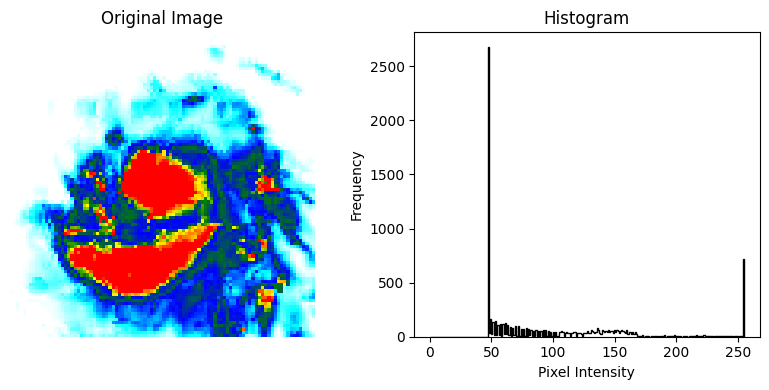

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Lấy một số ảnh ngẫu nhiên từ dataframe (chẳng hạn lấy 1 ảnh)
random_index = np.random.randint(df.shape[0])
image_data = df.iloc[random_index, :].values

# Reshape ảnh về kích thước 96x96
image = image_data.reshape(96, 96)

# Tạo một colormap tùy chỉnh
boundaries = [0, 4, 8, 12, 16, 20]
colors = ['white', 'cyan', 'blue', 'green', 'yellow', 'red']
boundaries_normalized = np.linspace(0, 1, len(colors))
cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(boundaries_normalized, colors)))

# Hiển thị ảnh với colormap tùy chỉnh
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=cmap)
plt.title('Original Image')
plt.axis('off')

# Hiển thị histogram của ảnh
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 255), color='k', histtype='step')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.tight_layout()
plt.show()



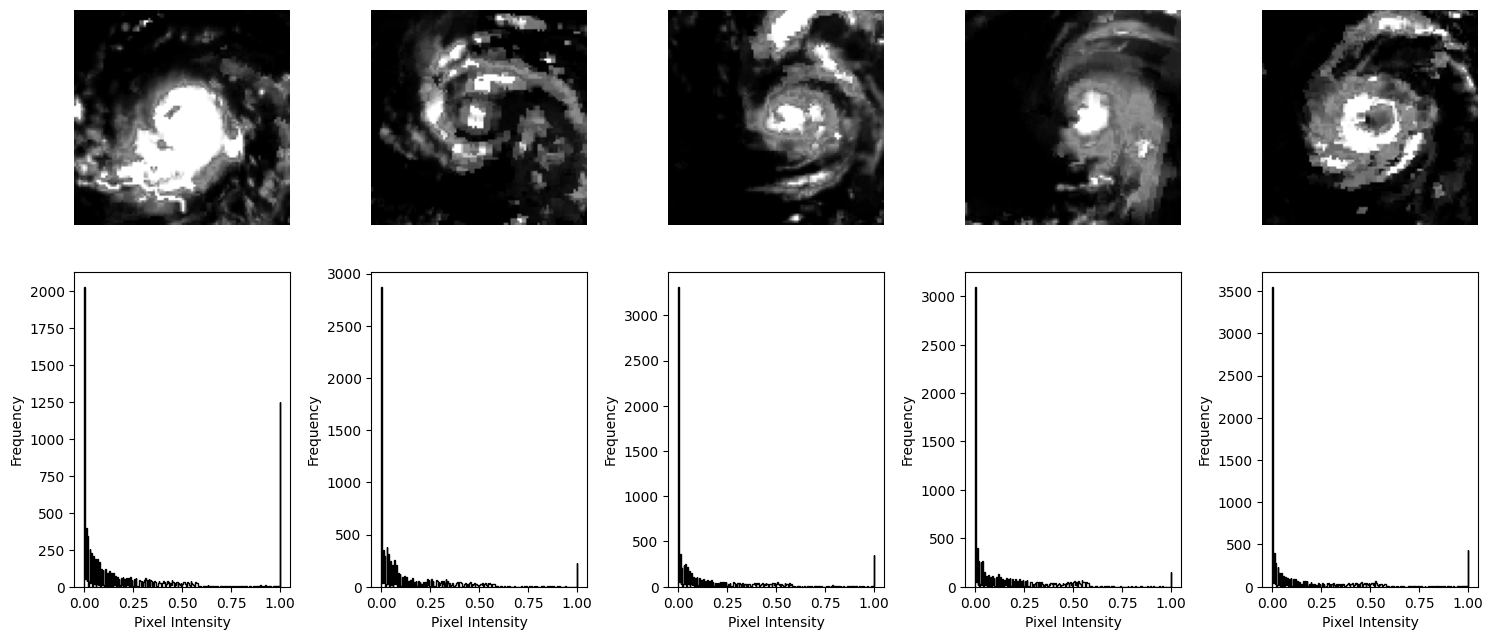

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Chọn ngẫu nhiên một số ảnh từ dataframe
num_images_to_display = 5
random_indices = random.sample(range(len(df)), num_images_to_display)

# Hiển thị các ảnh và histogram của chúng
plt.figure(figsize=(15, 7))
for i, index in enumerate(random_indices, 1):
    # Đọc dữ liệu pixel của ảnh từ dataframe và chuyển về ma trận hình ảnh
    pixel_data = df.iloc[index].values
    image_array = np.reshape(pixel_data, (96, 96))

    # Chuẩn hóa dữ liệu pixel về khoảng [0, 1]
    image_array = (image_array - image_array.min()) / (image_array.max() - image_array.min())

    # Hiển thị hình ảnh
    plt.subplot(2, num_images_to_display, i)
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')

    # Vẽ histogram của hình ảnh đã chuẩn hóa
    plt.subplot(2, num_images_to_display, i + num_images_to_display)
    plt.hist(image_array.ravel(), bins=256, range=(0, 1), color='k', histtype='step')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()





# **NORMALIZTION**

In [ ]:
import numpy as np

# Chuẩn hóa toàn bộ dữ liệu trong DataFrame về phạm vi từ 0 đến 1 bằng phương pháp min-max
df_normalized = (df - df.min()) / (df.max() - df.min())

# Chuyển đổi DataFrame đã chuẩn hóa thành numpy array
x = np.array(df_normalized.values)

# Hiển thị kích thước của x
print("Kích thước của x:", x.shape)




Kích thước của x: (3673, 9216)


In [ ]:

x = x.reshape(-1, 96, 96, 1)


# SET UP HYPER-**PARAMETER**

In [ ]:
import pandas as pd  # Để đọc dữ liệu từ file CSV và làm việc với dataframe
import numpy as np  # Để làm việc với mảng và các thao tác số học
import tensorflow as tf  # Để xây dựng và huấn luyện mô hình autoencoder
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D  # Các lớp cần thiết cho mô hình autoencoder
from keras.models import Model  # Để xây dựng mô hình autoencoder
from keras.callbacks import CSVLogger  # Để ghi log trong quá trình huấn luyện mô hình
from sklearn.cluster import KMeans  # Để thực hiện phân cụm dữ liệu
import os
if __name__ == "__main__":
    from time import time

    # setting the hyperparameters
    dataset = 'your_dataset'
    batch_size = 32
    epochs = 200
    save_dir = ''

In [ ]:
    from keras.callbacks import ModelCheckpoint


    model = CAE(input_shape=x.shape[1:], filters=[32, 64, 128, 20])
    model.summary()

    from keras.optimizers import Adam

    learning_rate = 0.0001 # Điều chỉnh giá trị tốc độ học tại đây
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    checkpoint_callback = ModelCheckpoint(filepath='/content/best_model_weights.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

    # Begin training
    t0 = time()
    csv_logger = CSVLogger(os.path.join(save_dir, '%s-pretrain-log.csv' % dataset))
    model.fit(x, x, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback,csv_logger])
    print('Training time: ', time() - t0)
    model.save(os.path.join(save_dir, '%s-pretrain-model-%d.h5' % (dataset, epochs)))





Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 64)        51264     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv3 (Conv2D)              (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 12, 12, 128)     

115/115 [==============================] - 6s 26ms/step - loss: 0.0737
Epoch 2/200
115/115 [==============================] - ETA: 0s - loss: 0.0263

115/115 [==============================] - 3s 25ms/step - loss: 0.0263
Epoch 3/200
114/115 [============================>.] - ETA: 0s - loss: 0.0218

115/115 [==============================] - 3s 26ms/step - loss: 0.0218
Epoch 4/200
114/115 [============================>.] - ETA: 0s - loss: 0.0196

115/115 [==============================] - 3s 27ms/step - loss: 0.0196
Epoch 5/200
114/115 [============================>.] - ETA: 0s - loss: 0.0186

115/115 [==============================] - 3s 25ms/step - loss: 0.0186
Epoch 6/200
113/115 [============================>.] - ETA: 0s - loss: 0.0180

115/115 [==============================] - 3s 25ms/step - loss: 0.0180
Epoch 7/200
114/115 [============================>.] - ETA: 0s - loss: 0.0174

115/115 [==============================] - 3s 26ms/step - loss: 0.0174
Epoch 8/200
115/115 [==============================] - ETA: 0s - loss: 0.0170

115/115 [==============================] - 3s 27ms/step - loss: 0.0170
Epoch 9/200
114/115 [============================>.] - ETA: 0s - loss: 0.0167

115/115 [==============================] - 3s 26ms/step - loss: 0.0167
Epoch 10/200
114/115 [============================>.] - ETA: 0s - loss: 0.0162

115/115 [==============================] - 3s 25ms/step - loss: 0.0162
Epoch 11/200
114/115 [============================>.] - ETA: 0s - loss: 0.0159

115/115 [==============================] - 3s 26ms/step - loss: 0.0159
Epoch 12/200
115/115 [==============================] - ETA: 0s - loss: 0.0158

115/115 [==============================] - 3s 26ms/step - loss: 0.0158
Epoch 13/200
113/115 [============================>.] - ETA: 0s - loss: 0.0156

115/115 [==============================] - 3s 26ms/step - loss: 0.0156
Epoch 14/200
114/115 [============================>.] - ETA: 0s - loss: 0.0155

115/115 [==============================] - 3s 26ms/step - loss: 0.0155
Epoch 15/200
114/115 [============================>.] - ETA: 0s - loss: 0.0153

115/115 [==============================] - 3s 26ms/step - loss: 0.0153
Epoch 16/200
115/115 [==============================] - ETA: 0s - loss: 0.0152

115/115 [==============================] - 3s 26ms/step - loss: 0.0152
Epoch 17/200
114/115 [============================>.] - ETA: 0s - loss: 0.0151

115/115 [==============================] - 3s 26ms/step - loss: 0.0152
Epoch 18/200
113/115 [============================>.] - ETA: 0s - loss: 0.0151

115/115 [==============================] - 3s 25ms/step - loss: 0.0151
Epoch 19/200
114/115 [============================>.] - ETA: 0s - loss: 0.0150

115/115 [==============================] - 3s 25ms/step - loss: 0.0150
Epoch 20/200
113/115 [============================>.] - ETA: 0s - loss: 0.0149

115/115 [==============================] - 3s 25ms/step - loss: 0.0149
Epoch 21/200
113/115 [============================>.] - ETA: 0s - loss: 0.0148

115/115 [==============================] - 3s 26ms/step - loss: 0.0148
Epoch 22/200
113/115 [============================>.] - ETA: 0s - loss: 0.0148

115/115 [==============================] - 3s 25ms/step - loss: 0.0148
Epoch 23/200
113/115 [============================>.] - ETA: 0s - loss: 0.0148

115/115 [==============================] - 3s 25ms/step - loss: 0.0147
Epoch 24/200
113/115 [============================>.] - ETA: 0s - loss: 0.0147

115/115 [==============================] - 3s 25ms/step - loss: 0.0147
Epoch 25/200
114/115 [============================>.] - ETA: 0s - loss: 0.0146

115/115 [==============================] - 3s 26ms/step - loss: 0.0146
Epoch 26/200
114/115 [============================>.] - ETA: 0s - loss: 0.0145

115/115 [==============================] - 3s 26ms/step - loss: 0.0145
Epoch 27/200
114/115 [============================>.] - ETA: 0s - loss: 0.0146

115/115 [==============================] - 3s 25ms/step - loss: 0.0146
Epoch 28/200
114/115 [============================>.] - ETA: 0s - loss: 0.0145

115/115 [==============================] - 3s 25ms/step - loss: 0.0146
Epoch 29/200
114/115 [============================>.] - ETA: 0s - loss: 0.0144

115/115 [==============================] - 3s 26ms/step - loss: 0.0144
Epoch 30/200
113/115 [============================>.] - ETA: 0s - loss: 0.0143

115/115 [==============================] - 3s 26ms/step - loss: 0.0143
Epoch 31/200
114/115 [============================>.] - ETA: 0s - loss: 0.0143

115/115 [==============================] - 3s 25ms/step - loss: 0.0143
Epoch 32/200
113/115 [============================>.] - ETA: 0s - loss: 0.0142

115/115 [==============================] - 3s 25ms/step - loss: 0.0142
Epoch 33/200
114/115 [============================>.] - ETA: 0s - loss: 0.0142

115/115 [==============================] - 3s 25ms/step - loss: 0.0142
Epoch 34/200
113/115 [============================>.] - ETA: 0s - loss: 0.0142

115/115 [==============================] - 3s 27ms/step - loss: 0.0142
Epoch 35/200
113/115 [============================>.] - ETA: 0s - loss: 0.0142

115/115 [==============================] - 3s 25ms/step - loss: 0.0141
Epoch 36/200
113/115 [============================>.] - ETA: 0s - loss: 0.0140

115/115 [==============================] - 3s 25ms/step - loss: 0.0141
Epoch 37/200
115/115 [==============================] - ETA: 0s - loss: 0.0140

115/115 [==============================] - 3s 25ms/step - loss: 0.0140
Epoch 38/200
114/115 [============================>.] - ETA: 0s - loss: 0.0140

115/115 [==============================] - 3s 27ms/step - loss: 0.0140
Epoch 39/200
113/115 [============================>.] - ETA: 0s - loss: 0.0140

115/115 [==============================] - 3s 26ms/step - loss: 0.0140
Epoch 40/200
114/115 [============================>.] - ETA: 0s - loss: 0.0139

115/115 [==============================] - 3s 25ms/step - loss: 0.0139
Epoch 41/200
114/115 [============================>.] - ETA: 0s - loss: 0.0139

115/115 [==============================] - 3s 25ms/step - loss: 0.0139
Epoch 42/200
115/115 [==============================] - ETA: 0s - loss: 0.0139

115/115 [==============================] - 3s 26ms/step - loss: 0.0139
Epoch 43/200
114/115 [============================>.] - ETA: 0s - loss: 0.0138

115/115 [==============================] - 3s 26ms/step - loss: 0.0138
Epoch 44/200
113/115 [============================>.] - ETA: 0s - loss: 0.0138

115/115 [==============================] - 3s 25ms/step - loss: 0.0138
Epoch 45/200
113/115 [============================>.] - ETA: 0s - loss: 0.0137

115/115 [==============================] - 3s 25ms/step - loss: 0.0137
Epoch 46/200
114/115 [============================>.] - ETA: 0s - loss: 0.0137

115/115 [==============================] - 3s 25ms/step - loss: 0.0137
Epoch 47/200
114/115 [============================>.] - ETA: 0s - loss: 0.0137

115/115 [==============================] - 3s 27ms/step - loss: 0.0137
Epoch 48/200
114/115 [============================>.] - ETA: 0s - loss: 0.0137

115/115 [==============================] - 3s 25ms/step - loss: 0.0136
Epoch 49/200
113/115 [============================>.] - ETA: 0s - loss: 0.0136

115/115 [==============================] - 3s 25ms/step - loss: 0.0136
Epoch 50/200
113/115 [============================>.] - ETA: 0s - loss: 0.0135

115/115 [==============================] - 3s 25ms/step - loss: 0.0135
Epoch 51/200
114/115 [============================>.] - ETA: 0s - loss: 0.0135

115/115 [==============================] - 3s 26ms/step - loss: 0.0135
Epoch 52/200
113/115 [============================>.] - ETA: 0s - loss: 0.0135

115/115 [==============================] - 3s 26ms/step - loss: 0.0135
Epoch 53/200
114/115 [============================>.] - ETA: 0s - loss: 0.0134

115/115 [==============================] - 3s 25ms/step - loss: 0.0134
Epoch 54/200
113/115 [============================>.] - ETA: 0s - loss: 0.0134

115/115 [==============================] - 3s 25ms/step - loss: 0.0134
Epoch 55/200
113/115 [============================>.] - ETA: 0s - loss: 0.0133

115/115 [==============================] - 3s 26ms/step - loss: 0.0133
Epoch 56/200
113/115 [============================>.] - ETA: 0s - loss: 0.0133

115/115 [==============================] - 3s 26ms/step - loss: 0.0133
Epoch 57/200
114/115 [============================>.] - ETA: 0s - loss: 0.0133

115/115 [==============================] - 3s 25ms/step - loss: 0.0133
Epoch 58/200
113/115 [============================>.] - ETA: 0s - loss: 0.0133

115/115 [==============================] - 3s 25ms/step - loss: 0.0133
Epoch 59/200
114/115 [============================>.] - ETA: 0s - loss: 0.0132

115/115 [==============================] - 3s 25ms/step - loss: 0.0132
Epoch 60/200
114/115 [============================>.] - ETA: 0s - loss: 0.0131

115/115 [==============================] - 3s 27ms/step - loss: 0.0131
Epoch 61/200
113/115 [============================>.] - ETA: 0s - loss: 0.0131

115/115 [==============================] - 3s 25ms/step - loss: 0.0131
Epoch 62/200
114/115 [============================>.] - ETA: 0s - loss: 0.0131

115/115 [==============================] - 3s 25ms/step - loss: 0.0131
Epoch 63/200
114/115 [============================>.] - ETA: 0s - loss: 0.0130

115/115 [==============================] - 3s 25ms/step - loss: 0.0130
Epoch 64/200
114/115 [============================>.] - ETA: 0s - loss: 0.0130

115/115 [==============================] - 3s 27ms/step - loss: 0.0130
Epoch 65/200
113/115 [============================>.] - ETA: 0s - loss: 0.0130

115/115 [==============================] - 3s 25ms/step - loss: 0.0130
Epoch 66/200
114/115 [============================>.] - ETA: 0s - loss: 0.0129

115/115 [==============================] - 3s 25ms/step - loss: 0.0129
Epoch 67/200
113/115 [============================>.] - ETA: 0s - loss: 0.0129

115/115 [==============================] - 3s 25ms/step - loss: 0.0129
Epoch 68/200
114/115 [============================>.] - ETA: 0s - loss: 0.0128

115/115 [==============================] - 3s 26ms/step - loss: 0.0128
Epoch 69/200
114/115 [============================>.] - ETA: 0s - loss: 0.0128

115/115 [==============================] - 3s 26ms/step - loss: 0.0128
Epoch 70/200
113/115 [============================>.] - ETA: 0s - loss: 0.0128

115/115 [==============================] - 3s 25ms/step - loss: 0.0128
Epoch 71/200
113/115 [============================>.] - ETA: 0s - loss: 0.0128

115/115 [==============================] - 3s 25ms/step - loss: 0.0128
Epoch 72/200
114/115 [============================>.] - ETA: 0s - loss: 0.0127

115/115 [==============================] - 3s 26ms/step - loss: 0.0127
Epoch 73/200
114/115 [============================>.] - ETA: 0s - loss: 0.0127

115/115 [==============================] - 3s 27ms/step - loss: 0.0127
Epoch 74/200
113/115 [============================>.] - ETA: 0s - loss: 0.0127

115/115 [==============================] - 3s 25ms/step - loss: 0.0127
Epoch 75/200
113/115 [============================>.] - ETA: 0s - loss: 0.0126

115/115 [==============================] - 3s 25ms/step - loss: 0.0126
Epoch 76/200
113/115 [============================>.] - ETA: 0s - loss: 0.0126

115/115 [==============================] - 3s 25ms/step - loss: 0.0126
Epoch 77/200
113/115 [============================>.] - ETA: 0s - loss: 0.0125

115/115 [==============================] - 3s 27ms/step - loss: 0.0125
Epoch 78/200
114/115 [============================>.] - ETA: 0s - loss: 0.0125

115/115 [==============================] - 3s 25ms/step - loss: 0.0125
Epoch 79/200
114/115 [============================>.] - ETA: 0s - loss: 0.0124

115/115 [==============================] - 3s 26ms/step - loss: 0.0125
Epoch 80/200
113/115 [============================>.] - ETA: 0s - loss: 0.0124

115/115 [==============================] - 3s 26ms/step - loss: 0.0124
Epoch 81/200
114/115 [============================>.] - ETA: 0s - loss: 0.0124

115/115 [==============================] - 3s 27ms/step - loss: 0.0124
Epoch 82/200
113/115 [============================>.] - ETA: 0s - loss: 0.0124

115/115 [==============================] - 3s 26ms/step - loss: 0.0124
Epoch 83/200
113/115 [============================>.] - ETA: 0s - loss: 0.0123

115/115 [==============================] - 3s 26ms/step - loss: 0.0123
Epoch 84/200
114/115 [============================>.] - ETA: 0s - loss: 0.0123

115/115 [==============================] - 3s 26ms/step - loss: 0.0123
Epoch 85/200
114/115 [============================>.] - ETA: 0s - loss: 0.0122

115/115 [==============================] - 3s 26ms/step - loss: 0.0122
Epoch 86/200
114/115 [============================>.] - ETA: 0s - loss: 0.0122

115/115 [==============================] - 3s 27ms/step - loss: 0.0122
Epoch 87/200
114/115 [============================>.] - ETA: 0s - loss: 0.0122

115/115 [==============================] - 3s 26ms/step - loss: 0.0122
Epoch 88/200
114/115 [============================>.] - ETA: 0s - loss: 0.0122

115/115 [==============================] - 3s 26ms/step - loss: 0.0122
Epoch 89/200
115/115 [==============================] - ETA: 0s - loss: 0.0121

115/115 [==============================] - 3s 26ms/step - loss: 0.0121
Epoch 90/200
113/115 [============================>.] - ETA: 0s - loss: 0.0120

115/115 [==============================] - 3s 27ms/step - loss: 0.0120
Epoch 91/200
115/115 [==============================] - ETA: 0s - loss: 0.0120

115/115 [==============================] - 3s 26ms/step - loss: 0.0120
Epoch 92/200
113/115 [============================>.] - ETA: 0s - loss: 0.0120

115/115 [==============================] - 3s 26ms/step - loss: 0.0120
Epoch 93/200
114/115 [============================>.] - ETA: 0s - loss: 0.0121

115/115 [==============================] - 3s 26ms/step - loss: 0.0121
Epoch 94/200
114/115 [============================>.] - ETA: 0s - loss: 0.0119

115/115 [==============================] - 3s 27ms/step - loss: 0.0119
Epoch 95/200
114/115 [============================>.] - ETA: 0s - loss: 0.0119

115/115 [==============================] - 3s 26ms/step - loss: 0.0119
Epoch 96/200
115/115 [==============================] - ETA: 0s - loss: 0.0119

115/115 [==============================] - 3s 26ms/step - loss: 0.0119
Epoch 97/200
113/115 [============================>.] - ETA: 0s - loss: 0.0118

115/115 [==============================] - 3s 26ms/step - loss: 0.0118
Epoch 98/200
115/115 [==============================] - ETA: 0s - loss: 0.0118

115/115 [==============================] - 3s 27ms/step - loss: 0.0118
Epoch 99/200
114/115 [============================>.] - ETA: 0s - loss: 0.0118

115/115 [==============================] - 3s 26ms/step - loss: 0.0118
Epoch 100/200
114/115 [============================>.] - ETA: 0s - loss: 0.0117

115/115 [==============================] - 3s 26ms/step - loss: 0.0117
Epoch 101/200
115/115 [==============================] - ETA: 0s - loss: 0.0117

115/115 [==============================] - 3s 26ms/step - loss: 0.0117
Epoch 102/200
115/115 [==============================] - ETA: 0s - loss: 0.0117

115/115 [==============================] - 3s 27ms/step - loss: 0.0117
Epoch 103/200
113/115 [============================>.] - ETA: 0s - loss: 0.0116

115/115 [==============================] - 3s 27ms/step - loss: 0.0116
Epoch 104/200
114/115 [============================>.] - ETA: 0s - loss: 0.0116

115/115 [==============================] - 3s 26ms/step - loss: 0.0117
Epoch 105/200
113/115 [============================>.] - ETA: 0s - loss: 0.0115

115/115 [==============================] - 3s 26ms/step - loss: 0.0115
Epoch 106/200
114/115 [============================>.] - ETA: 0s - loss: 0.0115

115/115 [==============================] - 3s 27ms/step - loss: 0.0115
Epoch 107/200
113/115 [============================>.] - ETA: 0s - loss: 0.0115

115/115 [==============================] - 3s 27ms/step - loss: 0.0115
Epoch 108/200
114/115 [============================>.] - ETA: 0s - loss: 0.0114

115/115 [==============================] - 3s 26ms/step - loss: 0.0114
Epoch 109/200
115/115 [==============================] - ETA: 0s - loss: 0.0114

115/115 [==============================] - 3s 26ms/step - loss: 0.0114
Epoch 110/200
113/115 [============================>.] - ETA: 0s - loss: 0.0114

115/115 [==============================] - 3s 26ms/step - loss: 0.0114
Epoch 111/200
113/115 [============================>.] - ETA: 0s - loss: 0.0114

115/115 [==============================] - 3s 27ms/step - loss: 0.0114
Epoch 112/200
114/115 [============================>.] - ETA: 0s - loss: 0.0114

115/115 [==============================] - 3s 26ms/step - loss: 0.0114
Epoch 113/200
114/115 [============================>.] - ETA: 0s - loss: 0.0113

115/115 [==============================] - 3s 26ms/step - loss: 0.0113
Epoch 114/200
113/115 [============================>.] - ETA: 0s - loss: 0.0113

115/115 [==============================] - 3s 26ms/step - loss: 0.0113
Epoch 115/200
114/115 [============================>.] - ETA: 0s - loss: 0.0113

115/115 [==============================] - 3s 27ms/step - loss: 0.0113
Epoch 116/200
113/115 [============================>.] - ETA: 0s - loss: 0.0112

115/115 [==============================] - 3s 26ms/step - loss: 0.0112
Epoch 117/200
114/115 [============================>.] - ETA: 0s - loss: 0.0112

115/115 [==============================] - 3s 26ms/step - loss: 0.0112
Epoch 118/200
114/115 [============================>.] - ETA: 0s - loss: 0.0112

115/115 [==============================] - 3s 25ms/step - loss: 0.0111
Epoch 119/200
114/115 [============================>.] - ETA: 0s - loss: 0.0112

115/115 [==============================] - 3s 26ms/step - loss: 0.0112
Epoch 120/200
113/115 [============================>.] - ETA: 0s - loss: 0.0111

115/115 [==============================] - 3s 26ms/step - loss: 0.0111
Epoch 121/200
114/115 [============================>.] - ETA: 0s - loss: 0.0111

115/115 [==============================] - 3s 25ms/step - loss: 0.0111
Epoch 122/200
113/115 [============================>.] - ETA: 0s - loss: 0.0111

115/115 [==============================] - 3s 25ms/step - loss: 0.0111
Epoch 123/200
114/115 [============================>.] - ETA: 0s - loss: 0.0110

115/115 [==============================] - 3s 25ms/step - loss: 0.0110
Epoch 124/200
113/115 [============================>.] - ETA: 0s - loss: 0.0110

115/115 [==============================] - 3s 26ms/step - loss: 0.0110
Epoch 125/200
113/115 [============================>.] - ETA: 0s - loss: 0.0109

115/115 [==============================] - 3s 25ms/step - loss: 0.0109
Epoch 126/200
113/115 [============================>.] - ETA: 0s - loss: 0.0110

115/115 [==============================] - 3s 25ms/step - loss: 0.0110
Epoch 127/200
114/115 [============================>.] - ETA: 0s - loss: 0.0109

115/115 [==============================] - 3s 25ms/step - loss: 0.0109
Epoch 128/200
114/115 [============================>.] - ETA: 0s - loss: 0.0109

115/115 [==============================] - 3s 26ms/step - loss: 0.0109
Epoch 129/200
113/115 [============================>.] - ETA: 0s - loss: 0.0108

115/115 [==============================] - 3s 25ms/step - loss: 0.0108
Epoch 130/200
115/115 [==============================] - ETA: 0s - loss: 0.0108

115/115 [==============================] - 3s 25ms/step - loss: 0.0108
Epoch 131/200
114/115 [============================>.] - ETA: 0s - loss: 0.0108

115/115 [==============================] - 3s 26ms/step - loss: 0.0108
Epoch 132/200
114/115 [============================>.] - ETA: 0s - loss: 0.0108

115/115 [==============================] - 3s 26ms/step - loss: 0.0108
Epoch 133/200
113/115 [============================>.] - ETA: 0s - loss: 0.0107

115/115 [==============================] - 3s 26ms/step - loss: 0.0107
Epoch 134/200
113/115 [============================>.] - ETA: 0s - loss: 0.0107

115/115 [==============================] - 3s 25ms/step - loss: 0.0107
Epoch 135/200
114/115 [============================>.] - ETA: 0s - loss: 0.0107

115/115 [==============================] - 3s 25ms/step - loss: 0.0107
Epoch 136/200
114/115 [============================>.] - ETA: 0s - loss: 0.0108

115/115 [==============================] - 3s 26ms/step - loss: 0.0108
Epoch 137/200
114/115 [============================>.] - ETA: 0s - loss: 0.0106

115/115 [==============================] - 3s 27ms/step - loss: 0.0106
Epoch 138/200
114/115 [============================>.] - ETA: 0s - loss: 0.0106

115/115 [==============================] - 3s 25ms/step - loss: 0.0107
Epoch 139/200
113/115 [============================>.] - ETA: 0s - loss: 0.0106

115/115 [==============================] - 3s 25ms/step - loss: 0.0106
Epoch 140/200
114/115 [============================>.] - ETA: 0s - loss: 0.0106

115/115 [==============================] - 3s 25ms/step - loss: 0.0105
Epoch 141/200
115/115 [==============================] - ETA: 0s - loss: 0.0105

115/115 [==============================] - 3s 27ms/step - loss: 0.0105
Epoch 142/200
113/115 [============================>.] - ETA: 0s - loss: 0.0105

115/115 [==============================] - 3s 25ms/step - loss: 0.0105
Epoch 143/200
113/115 [============================>.] - ETA: 0s - loss: 0.0105

115/115 [==============================] - 3s 25ms/step - loss: 0.0105
Epoch 144/200
113/115 [============================>.] - ETA: 0s - loss: 0.0105

115/115 [==============================] - 3s 25ms/step - loss: 0.0105
Epoch 145/200
113/115 [============================>.] - ETA: 0s - loss: 0.0104

115/115 [==============================] - 3s 26ms/step - loss: 0.0104
Epoch 146/200
113/115 [============================>.] - ETA: 0s - loss: 0.0104

115/115 [==============================] - 3s 26ms/step - loss: 0.0104
Epoch 147/200
115/115 [==============================] - ETA: 0s - loss: 0.0104

115/115 [==============================] - 3s 25ms/step - loss: 0.0104
Epoch 148/200
114/115 [============================>.] - ETA: 0s - loss: 0.0103

115/115 [==============================] - 3s 25ms/step - loss: 0.0103
Epoch 149/200
115/115 [==============================] - ETA: 0s - loss: 0.0103

115/115 [==============================] - 3s 26ms/step - loss: 0.0103
Epoch 150/200
114/115 [============================>.] - ETA: 0s - loss: 0.0104

115/115 [==============================] - 3s 27ms/step - loss: 0.0104
Epoch 151/200
114/115 [============================>.] - ETA: 0s - loss: 0.0103

115/115 [==============================] - 3s 25ms/step - loss: 0.0103
Epoch 152/200
114/115 [============================>.] - ETA: 0s - loss: 0.0103

115/115 [==============================] - 3s 25ms/step - loss: 0.0103
Epoch 153/200
114/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 26ms/step - loss: 0.0102
Epoch 154/200
114/115 [============================>.] - ETA: 0s - loss: 0.0103

115/115 [==============================] - 3s 27ms/step - loss: 0.0103
Epoch 155/200
113/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 25ms/step - loss: 0.0102
Epoch 156/200
114/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 26ms/step - loss: 0.0102
Epoch 157/200
113/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 26ms/step - loss: 0.0102
Epoch 158/200
114/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 27ms/step - loss: 0.0102
Epoch 159/200
114/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 26ms/step - loss: 0.0102
Epoch 160/200
113/115 [============================>.] - ETA: 0s - loss: 0.0102

115/115 [==============================] - 3s 25ms/step - loss: 0.0102
Epoch 161/200
114/115 [============================>.] - ETA: 0s - loss: 0.0101

115/115 [==============================] - 3s 26ms/step - loss: 0.0101
Epoch 162/200
115/115 [==============================] - ETA: 0s - loss: 0.0101

115/115 [==============================] - 3s 26ms/step - loss: 0.0101
Epoch 163/200
113/115 [============================>.] - ETA: 0s - loss: 0.0101

115/115 [==============================] - 3s 26ms/step - loss: 0.0100
Epoch 164/200
115/115 [==============================] - ETA: 0s - loss: 0.0100

115/115 [==============================] - 3s 26ms/step - loss: 0.0100
Epoch 165/200
114/115 [============================>.] - ETA: 0s - loss: 0.0100

115/115 [==============================] - 3s 26ms/step - loss: 0.0100
Epoch 166/200
115/115 [==============================] - ETA: 0s - loss: 0.0100

115/115 [==============================] - 3s 26ms/step - loss: 0.0100
Epoch 167/200
113/115 [============================>.] - ETA: 0s - loss: 0.0099

115/115 [==============================] - 3s 27ms/step - loss: 0.0099
Epoch 168/200
115/115 [==============================] - ETA: 0s - loss: 0.0099

115/115 [==============================] - 3s 26ms/step - loss: 0.0099
Epoch 169/200
113/115 [============================>.] - ETA: 0s - loss: 0.0100

115/115 [==============================] - 3s 26ms/step - loss: 0.0100
Epoch 170/200
114/115 [============================>.] - ETA: 0s - loss: 0.0099

115/115 [==============================] - 3s 26ms/step - loss: 0.0099
Epoch 171/200
113/115 [============================>.] - ETA: 0s - loss: 0.0099

115/115 [==============================] - 3s 26ms/step - loss: 0.0099
Epoch 172/200
113/115 [============================>.] - ETA: 0s - loss: 0.0099

115/115 [==============================] - 3s 25ms/step - loss: 0.0099
Epoch 173/200
114/115 [============================>.] - ETA: 0s - loss: 0.0098

115/115 [==============================] - 3s 25ms/step - loss: 0.0098
Epoch 174/200
113/115 [============================>.] - ETA: 0s - loss: 0.0098

115/115 [==============================] - 3s 25ms/step - loss: 0.0098
Epoch 175/200
113/115 [============================>.] - ETA: 0s - loss: 0.0098

115/115 [==============================] - 3s 26ms/step - loss: 0.0098
Epoch 176/200
113/115 [============================>.] - ETA: 0s - loss: 0.0098

115/115 [==============================] - 3s 26ms/step - loss: 0.0098
Epoch 177/200
114/115 [============================>.] - ETA: 0s - loss: 0.0098

115/115 [==============================] - 3s 25ms/step - loss: 0.0098
Epoch 178/200
113/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 25ms/step - loss: 0.0097
Epoch 179/200
113/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 26ms/step - loss: 0.0097
Epoch 180/200
114/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 26ms/step - loss: 0.0097
Epoch 181/200
115/115 [==============================] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 26ms/step - loss: 0.0097
Epoch 182/200
114/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 25ms/step - loss: 0.0097
Epoch 183/200
114/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 26ms/step - loss: 0.0097
Epoch 184/200
115/115 [==============================] - ETA: 0s - loss: 0.0096

115/115 [==============================] - 3s 26ms/step - loss: 0.0096
Epoch 185/200
114/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 25ms/step - loss: 0.0097
Epoch 186/200
114/115 [============================>.] - ETA: 0s - loss: 0.0097

115/115 [==============================] - 3s 25ms/step - loss: 0.0097
Epoch 187/200
114/115 [============================>.] - ETA: 0s - loss: 0.0096

115/115 [==============================] - 3s 25ms/step - loss: 0.0095
Epoch 188/200
114/115 [============================>.] - ETA: 0s - loss: 0.0096

115/115 [==============================] - 3s 26ms/step - loss: 0.0096
Epoch 189/200
113/115 [============================>.] - ETA: 0s - loss: 0.0095

115/115 [==============================] - 3s 26ms/step - loss: 0.0095
Epoch 190/200
113/115 [============================>.] - ETA: 0s - loss: 0.0096

115/115 [==============================] - 3s 25ms/step - loss: 0.0096
Epoch 191/200
114/115 [============================>.] - ETA: 0s - loss: 0.0096

115/115 [==============================] - 3s 25ms/step - loss: 0.0096
Epoch 192/200
115/115 [==============================] - ETA: 0s - loss: 0.0095

115/115 [==============================] - 3s 26ms/step - loss: 0.0095
Epoch 193/200
115/115 [==============================] - ETA: 0s - loss: 0.0095

115/115 [==============================] - 3s 26ms/step - loss: 0.0095
Epoch 194/200
115/115 [==============================] - ETA: 0s - loss: 0.0094

115/115 [==============================] - 3s 25ms/step - loss: 0.0094
Epoch 195/200
115/115 [==============================] - ETA: 0s - loss: 0.0094

115/115 [==============================] - 3s 25ms/step - loss: 0.0094
Epoch 196/200
114/115 [============================>.] - ETA: 0s - loss: 0.0095

115/115 [==============================] - 3s 25ms/step - loss: 0.0095
Epoch 197/200
113/115 [============================>.] - ETA: 0s - loss: 0.0094

115/115 [==============================] - 3s 27ms/step - loss: 0.0094
Epoch 198/200
114/115 [============================>.] - ETA: 0s - loss: 0.0094

115/115 [==============================] - 3s 26ms/step - loss: 0.0094
Epoch 199/200
114/115 [============================>.] - ETA: 0s - loss: 0.0093

115/115 [==============================] - 3s 25ms/step - loss: 0.0093
Epoch 200/200
115/115 [==============================] - ETA: 0s - loss: 0.0094

115/115 [==============================] - 3s 25ms/step - loss: 0.0094
Training time:  625.150648355484


# **CLUSTERING**

In [ ]:
    # # Extract features
    # feature_model = Model(inputs=model.inputs, outputs=model.get_layer(name='dense').output)
    # features = feature_model.predict(x)
    # print('Feature shape:', features.shape)

    # # Perform clustering
    # km = KMeans(n_clusters=n_clusters, n_init=100)
    # pred = km.fit_predict(features)

# **RECONSTRUCTED IMAGE**

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt

# Load model từ file .h5
model = load_model('/content/final-pretrain-model-200.h5')

# Dùng model để dự đoán và tái tạo các ảnh từ đầu vào
reconstructed_images = model.predict(x)



115/115 [==============================] - 84s 704ms/step


In [ ]:
print('reconstruct')
print(reconstructed_images[0].reshape(96, 96))
print('Origin')
print(x[0].reshape(96, 96))

reconstruct
[[0.00972732 0.0044838  0.00268925 ... 0.03173165 0.04080014 0.06138426]
 [0.00571752 0.00312978 0.00207684 ... 0.02021318 0.02683711 0.0433761 ]
 [0.00436916 0.00272079 0.00205137 ... 0.0205879  0.02449162 0.03710436]
 ...
 [0.06107927 0.06625799 0.0852295  ... 0.2501511  0.23041414 0.19891639]
 [0.08190528 0.07881156 0.09137995 ... 0.19481821 0.1829962  0.17722519]
 [0.09924019 0.08876795 0.08380789 ... 0.18705653 0.18988597 0.19865625]]
Origin
[[0.         0.         0.         ... 0.02884615 0.         0.        ]
 [0.         0.         0.         ... 0.01923077 0.         0.        ]
 [0.00961538 0.         0.05769231 ... 0.01923077 0.         0.        ]
 ...
 [0.12019231 0.12019231 0.12019231 ... 0.09615385 0.08653846 0.09615385]
 [0.26442308 0.12019231 0.12019231 ... 0.08653846 0.07692308 0.08653846]
 [0.14903846 0.15865385 0.15865385 ... 0.08653846 0.06730769 0.07692308]]


In [ ]:
np.max(reconstructed_images[0].reshape(96, 96)*255)

254.99828

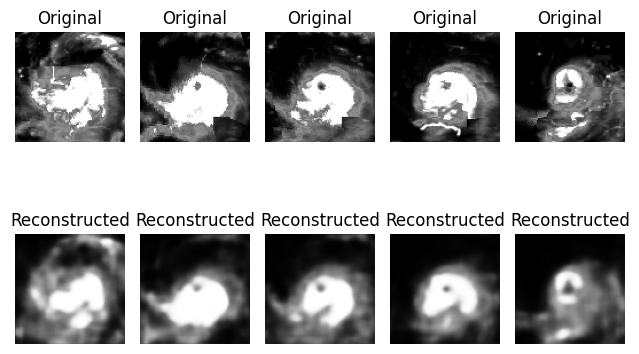

In [ ]:
# Hiển thị và so sánh ảnh gốc và ảnh tái tạo
num_images_to_display = 5
for i in range(num_images_to_display):
    # Hiển thị ảnh gốc
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(x[i].reshape(96, 96), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Hiển thị ảnh tái tạo
    plt.subplot(2, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(reconstructed_images[i].reshape(96, 96)*255, cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

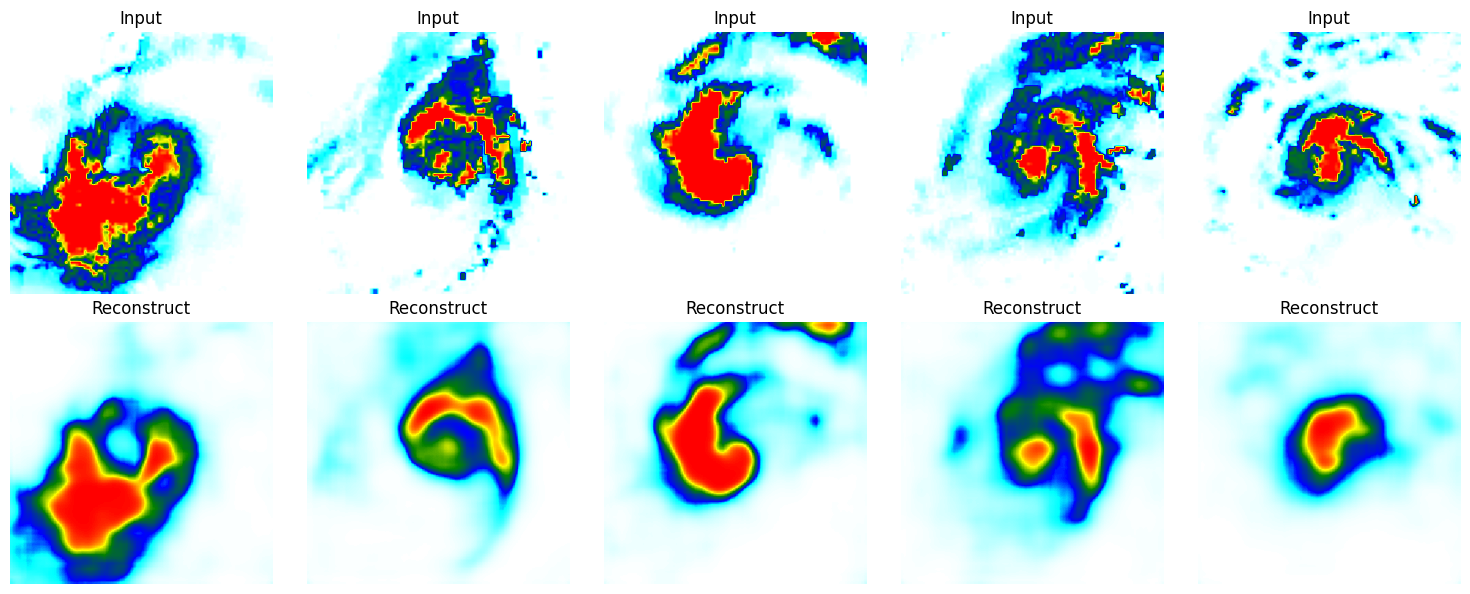

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Tạo một colormap tùy chỉnh
boundaries = [0,  10, 12, 18, 20]
colors = ['white', 'cyan', 'blue', 'green', 'yellow', 'red']

# Tạo một phạm vi mới của boundaries_normalized bắt đầu từ 0 và kết thúc với 1
boundaries_normalized = [0.0, 0.3, 0.4, 0.6, 0.8, 1.0]

# Tạo colormap tùy chỉnh
cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(boundaries_normalized, colors)))


# Hiển thị một số ảnh input và reconstruct
num_images_to_display = 5
random_indices = np.random.choice(len(x), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    # Hiển thị ảnh input
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(x[idx].reshape(96, 96), cmap=cmap)
    plt.title('Input')
    plt.axis('off')

    # Hiển thị ảnh reconstruct
    plt.subplot(2, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(reconstructed_images[idx].reshape(96, 96), cmap=cmap)
    plt.title('Reconstruct')
    plt.axis('off')

plt.tight_layout()
plt.show()


# **EVALUATION**

In [ ]:
import numpy as np

def pattern_correlation(image1, image2):
    """
    Tính mean và standard deviation của pattern correlation (PCOR) giữa hai ảnh.
    """
    pcors = []
    for i in range(len(image1)):
        pcor = np.corrcoef(image1[i].ravel(), image2[i].ravel())[0, 1]
        pcors.append(pcor)
    return np.mean(pcors), np.std(pcors)

def normalized_std(image1, image2):
    """
    Tính mean và standard deviation của normalized standard deviation (NSTD) giữa hai ảnh.
    """
    stds = []
    for i in range(len(image1)):
        std = np.std(image1[i] - image2[i])
        stds.append(std)
    return np.mean(stds), np.std(stds)

def mean_bias(image1, image2):
    """
    Tính mean và standard deviation của mean bias (MB) giữa hai ảnh.
    """
    biases = []
    for i in range(len(image1)):
        bias = np.mean(image1[i] - image2[i])
        biases.append(bias)
    return np.mean(biases), np.std(biases)

def root_mean_squared_error(image1, image2):
    """
    Tính mean và standard deviation của root mean squared error (RMSE) giữa hai ảnh.
    """
    rmses = []
    for i in range(len(image1)):
        mse = np.mean((image1[i] - image2[i]) ** 2)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    return np.mean(rmses), np.std(rmses)

# Tính toán các chỉ số
mean_pcor, std_pcor = pattern_correlation(x, reconstructed_images)
mean_nstd, std_nstd = normalized_std(x, reconstructed_images)
mean_mb, std_mb = mean_bias(x, reconstructed_images)
mean_rmse, std_rmse = root_mean_squared_error(x, reconstructed_images)

# Hiển thị kết quả
print("Mean and standard deviation of pattern correlation (PCOR):")
print("Mean PCOR:", mean_pcor)
print("Standard deviation PCOR:", std_pcor)
print("Mean and standard deviation of normalized standard deviation (NSTD):")
print("Mean NSTD:", mean_nstd)
print("Standard deviation NSTD:", std_nstd)
print("Mean and standard deviation of mean bias (MB):")
print("Mean MB:", mean_mb)
print("Standard deviation MB:", std_mb)
print("Mean and standard deviation of root mean squared error (RMSE):")
print("Mean RMSE:", mean_rmse)
print("Standard deviation RMSE:", std_rmse)


Mean and standard deviation of pattern correlation (PCOR):
Mean PCOR: 0.9239806863508663
Standard deviation PCOR: 0.03843137768736253
Mean and standard deviation of normalized standard deviation (NSTD):
Mean NSTD: 0.09346525299734196
Standard deviation NSTD: 0.022564758637827358
Mean and standard deviation of mean bias (MB):
Mean MB: -0.00026166398334721776
Standard deviation MB: 0.004409909188145381
Mean and standard deviation of root mean squared error (RMSE):
Mean RMSE: 0.09356863310335016
Standard deviation RMSE: 0.02256875088477553


115/115 [==============================] - 39s 330ms/step
Feature shape: (3673, 20)


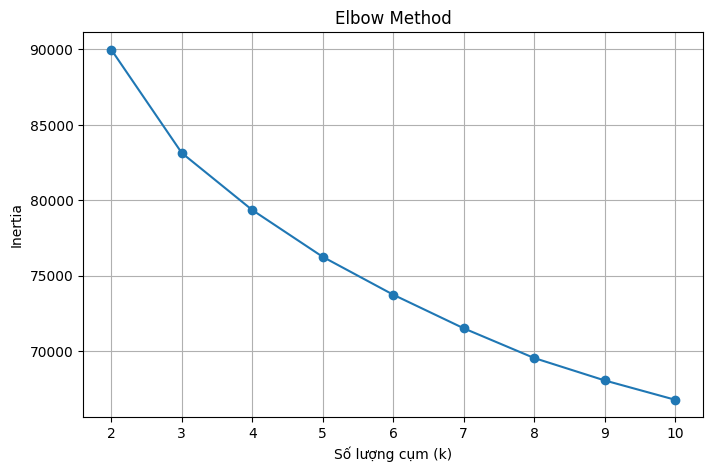

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.models import Model

# Giả sử model đã được định nghĩa trước đó
# Nếu không có, bạn cần định nghĩa model và load dữ liệu vào `x` trước khi chạy đoạn mã này

# Extract features
feature_model = Model(inputs=model.inputs, outputs=model.get_layer(name='dense').output)
features = feature_model.predict(x)
print('Feature shape:', features.shape)

# Số lượng cụm từ 2 đến 10
n_clusters_range = range(2, 11)
inertia = []

# Thực hiện clustering với từng số lượng cụm và tính inertia
for n_clusters in n_clusters_range:
    km = KMeans(n_clusters=n_clusters, n_init=30)
    km.fit(features)
    inertia.append(km.inertia_)

# Vẽ biểu đồ Elbow plot
plt.figure(figsize=(8, 5))  # Giảm chiều cao của plot
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()





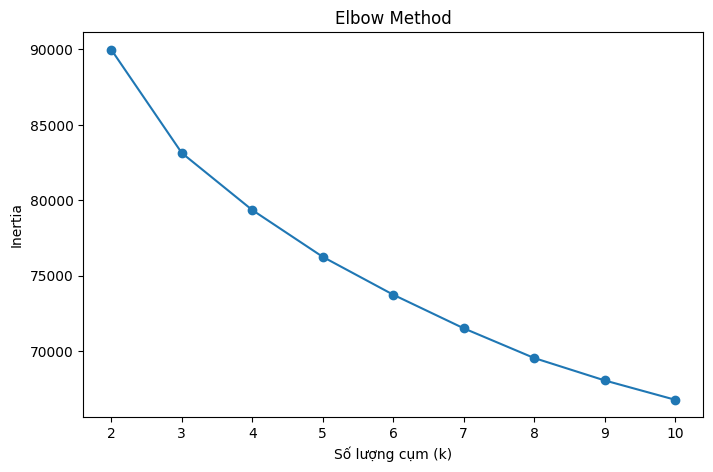

In [ ]:
plt.figure(figsize=(8, 5))  # Giảm chiều cao của plot
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.show()


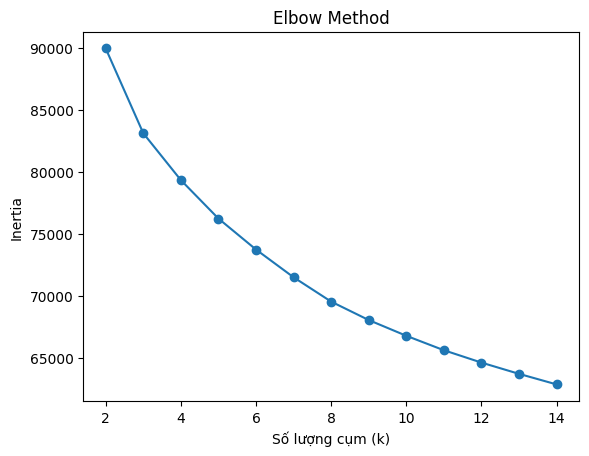

In [ ]:
# Vẽ biểu đồ Elbow plot
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')


plt.show()

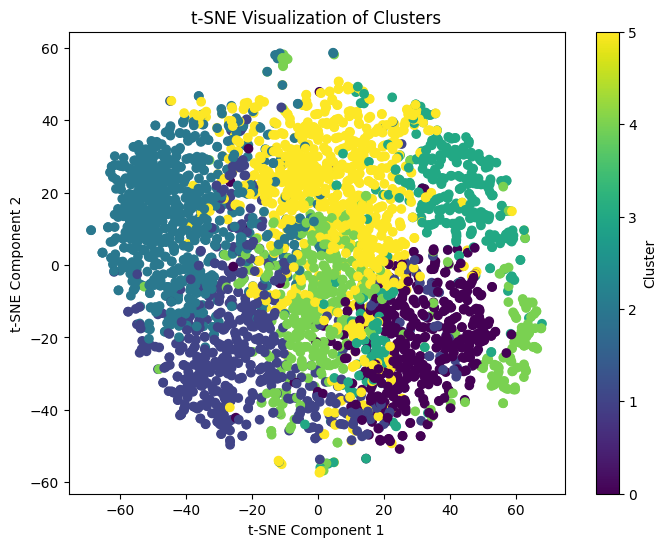

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Giảm số chiều về 2 sử dụng t-SNE
tsne = TSNE(n_components=2)
features_2d = tsne.fit_transform(features)

# Hiển thị lên plot
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=pred, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


115/115 [==============================] - 0s 3ms/step
Feature shape: (3673, 20)


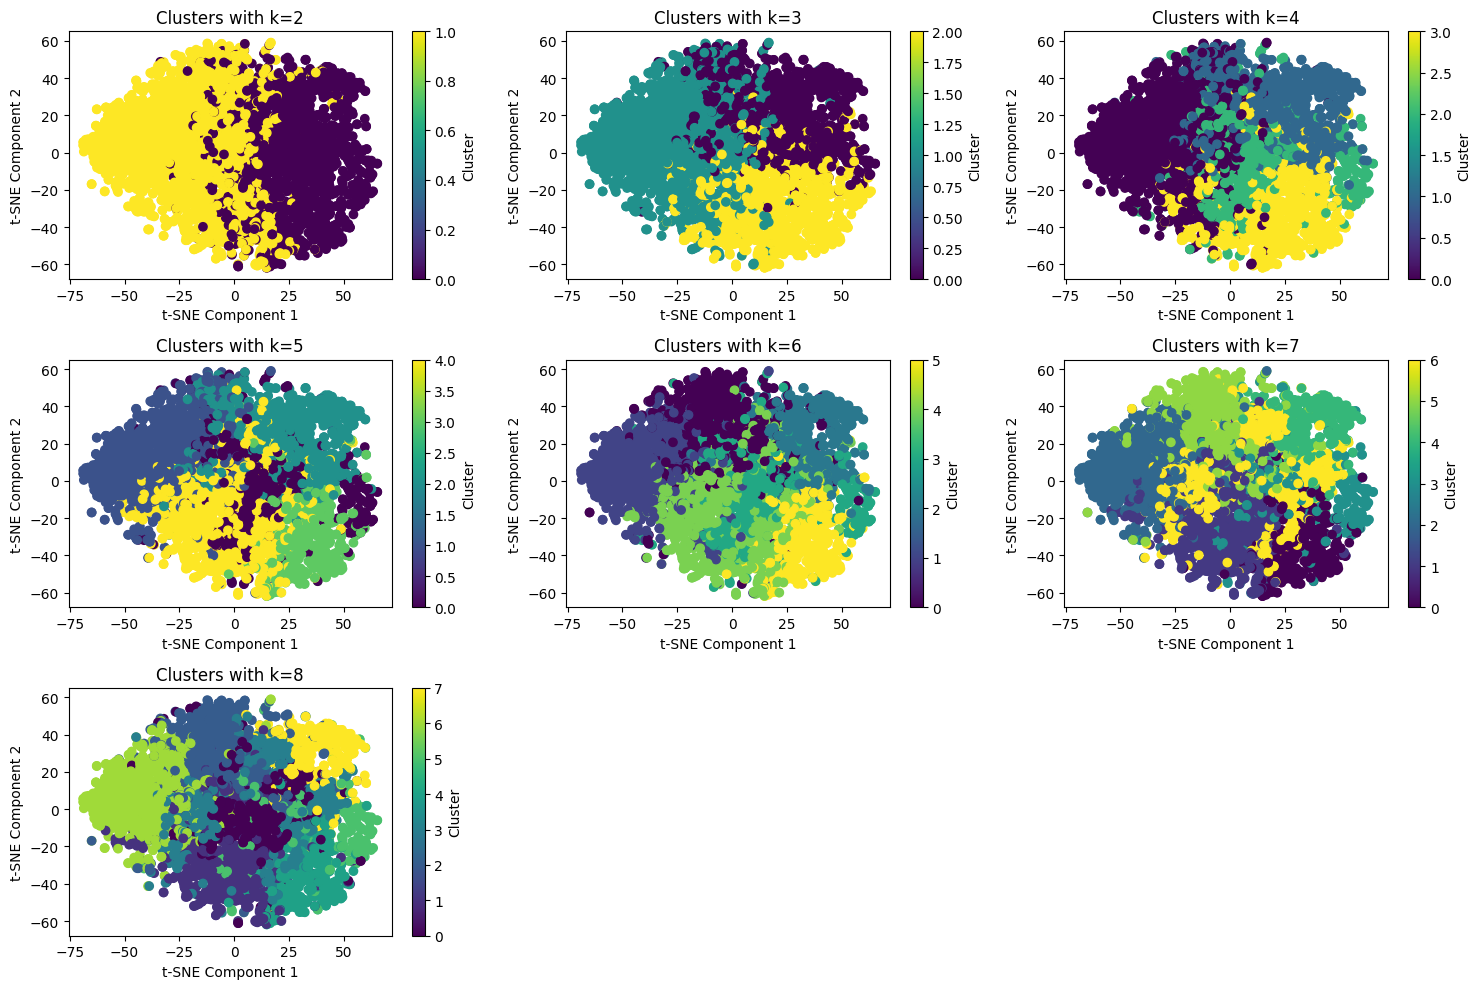

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from keras.models import Model

# Giả sử model đã được định nghĩa trước đó
# Nếu không có, bạn cần định nghĩa model và load dữ liệu vào `x` trước khi chạy đoạn mã này

# Extract features
feature_model = Model(inputs=model.inputs, outputs=model.get_layer(name='dense').output)
features = feature_model.predict(x)
print('Feature shape:', features.shape)

# Số lượng cụm từ 2 đến 8
n_clusters_range = range(2, 9)
inertia = []

# Thực hiện clustering với từng số lượng cụm và tính inertia
pred_list = []
for n_clusters in n_clusters_range:
    km = KMeans(n_clusters=n_clusters, n_init=30)
    labels = km.fit_predict(features)
    pred_list.append(labels)

# Giảm chiều dữ liệu về 2 chiều bằng t-SNE
tsne = TSNE(n_components=2)
features_2d = tsne.fit_transform(features)

# Vẽ scatter plot cho từng số lượng cụm
plt.figure(figsize=(15, 10))
for i, n_clusters in enumerate(n_clusters_range):
    plt.subplot(3, 3, i + 1)
    plt.scatter(features_2d[:, 0], features_2d[:, 1], c=pred_list[i], cmap='viridis')
    plt.title(f'Clusters with k={n_clusters}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 149ms/step


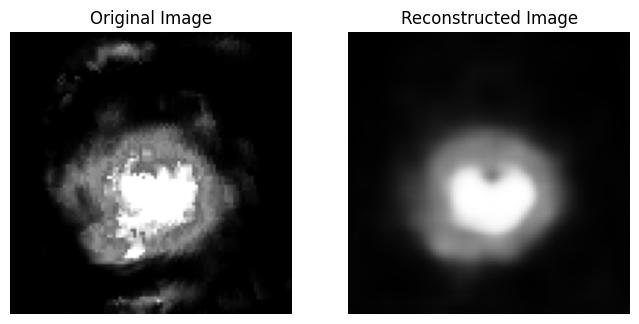

1/1 [==============================] - 0s 19ms/step


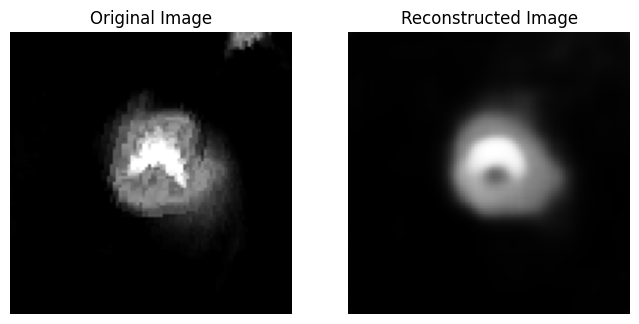

1/1 [==============================] - 0s 20ms/step


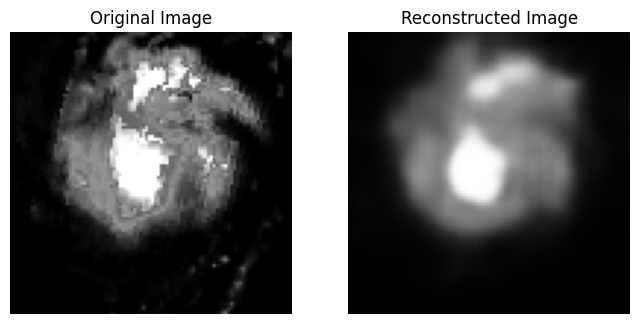

1/1 [==============================] - 0s 19ms/step


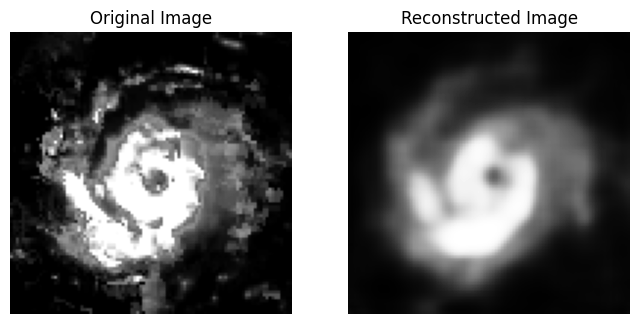

1/1 [==============================] - 0s 20ms/step


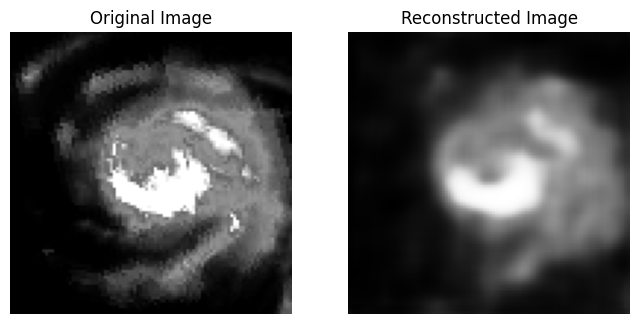

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.models import load_model

# Load pre-trained model
model = load_model('/content/your_dataset-pretrain-model-200.h5')

# Giả sử features đã được trích xuất từ dữ liệu x trước đó
# Đảm bảo features có kích thước (n_samples, n_features)
# Chạy K-means với số cụm là 5
n_clusters = 5
km = KMeans(n_clusters=n_clusters, n_init=100)
pred = km.fit_predict(features)

# Tính toán các ảnh đại diện cho từng cụm
cluster_centers = km.cluster_centers_
image_shape = (96, 96, 1)

# Tạo một hàm để tái tạo ảnh từ mô hình autoencoder
def reconstruct_image(model, original_image):
    reconstructed_image = model.predict(np.array([original_image]))
    return reconstructed_image.reshape(image_shape)

# Hiển thị ảnh gốc và ảnh tái tạo của đại diện của mỗi cụm
for cluster_center in cluster_centers:
    # Tìm feature vector gần nhất với tâm cụm
    distances = np.linalg.norm(features - cluster_center, axis=1)
    nearest_idx = np.argmin(distances)
    nearest_feature = features[nearest_idx]

    # Tìm ảnh gốc tương ứng với feature vector
    original_image = x[nearest_idx]

    # Tái tạo ảnh từ ảnh gốc
    reconstructed_image = reconstruct_image(model, original_image)

    # Hiển thị ảnh gốc và ảnh tái tạo
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image.reshape(image_shape), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image.reshape(image_shape), cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()




In [ ]:
# Tạo một colormap tùy chỉnh
boundaries = np.linspace(0, 1, n_clusters + 1)
colors = ['white', 'cyan', 'blue', 'green', 'yellow', 'red']  # Thay đổi màu sắc tùy ý tại đây

# Tạo colormap tùy chỉnh
cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(boundaries, colors)))

# Tạo một hàm để tái tạo ảnh từ mô hình autoencoder
def reconstruct_image(model, original_image):
    reconstructed_image = model.predict(np.array([original_image]))
    return reconstructed_image.reshape(image_shape)

# Hiển thị ảnh gốc và ảnh tái tạo của đại diện của mỗi cụm
for cluster_center, color in zip(cluster_centers, colors):
    # Tìm feature vector gần nhất với tâm cụm
    distances = np.linalg.norm(features - cluster_center, axis=1)
    nearest_idx = np.argmin(distances)
    nearest_feature = features[nearest_idx]

    # Tìm ảnh gốc tương ứng với feature vector
    original_image = x[nearest_idx]

    # Tái tạo ảnh từ ảnh gốc
    reconstructed_image = reconstruct_image(model, original_image)

    # Hiển thị ảnh gốc và ảnh tái tạo với màu sắc của cụm
    plt.figure(figsize=(4, 2))  # Điều chỉnh kích thước của plot tại đây
    plt.subplot(1, 2, 1)
    plt.imshow(original_image.reshape(image_shape), cmap=cmap)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image.reshape(image_shape), cmap=cmap)
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()

NameError: name 'cluster_centers' is not defined

In [ ]:
for n_clusters in range(2, 9):
    # Khởi tạo và fit KMeans với số lượng cụm mong muốn
    km = KMeans(n_clusters=n_clusters, n_init=30)
    pred = km.fit_predict(features)

    # Tính Silhouette Score
    silhouette_avg = silhouette_score(features, pred)

    # In Silhouette Score
    print("Number of clusters:", n_clusters, "| Silhouette Score:", silhouette_avg)


Number of clusters: 2 | Silhouette Score: 0.13738632
Number of clusters: 3 | Silhouette Score: 0.12000522
Number of clusters: 4 | Silhouette Score: 0.11380265
Number of clusters: 5 | Silhouette Score: 0.077057146
Number of clusters: 6 | Silhouette Score: 0.06977955
Number of clusters: 7 | Silhouette Score: 0.07776787
Number of clusters: 8 | Silhouette Score: 0.08084064


115/115 [==============================] - 33s 286ms/step
Feature shape: (3673, 20)
Number of clusters: 2 | Calinski-Harabasz Index (CHI): 531.5220188458569
Number of clusters: 3 | Calinski-Harabasz Index (CHI): 438.5232297068572
Number of clusters: 4 | Calinski-Harabasz Index (CHI): 364.43275130196264
Number of clusters: 5 | Calinski-Harabasz Index (CHI): 321.68380384585953
Number of clusters: 6 | Calinski-Harabasz Index (CHI): 290.92170213693123
Number of clusters: 7 | Calinski-Harabasz Index (CHI): 268.9193815442287
Number of clusters: 8 | Calinski-Harabasz Index (CHI): 251.78230375384285
Number of clusters: 9 | Calinski-Harabasz Index (CHI): 235.07506813108563


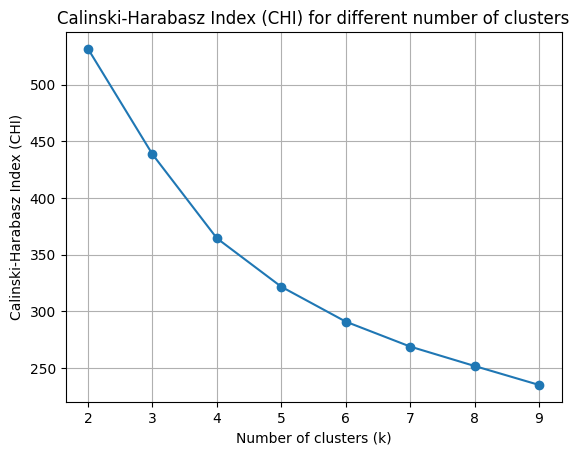

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
feature_model = Model(inputs=model.inputs, outputs=model.get_layer(name='dense').output)
features = feature_model.predict(x)
print('Feature shape:', features.shape)
# Tạo danh sách để lưu CHI cho mỗi số lượng cụm
chi_scores = []

# Tính CHI cho mỗi số lượng cụm từ 2 đến 9
for n_clusters in range(2, 10):
    # Khởi tạo và fit KMeans với số lượng cụm mong muốn
    km = KMeans(n_clusters=n_clusters, n_init=30)
    pred = km.fit_predict(features)

    # Tính CHI
    chi_score = calinski_harabasz_score(features, pred)
    chi_scores.append(chi_score)

    # In kết quả
    print("Number of clusters:", n_clusters, "| Calinski-Harabasz Index (CHI):", chi_score)

# Vẽ biểu đồ cho Calinski-Harabasz Index (CHI)
plt.plot(range(2, 10), chi_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index (CHI)')
plt.title('Calinski-Harabasz Index (CHI) for different number of clusters')
plt.grid(True)
plt.show()




In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

def dunn_index(X, labels):
    """Tính Dunn Index.

    Parameters:
    X (array-like): Dữ liệu.
    labels (array-like): Nhãn của các cụm.

    Returns:
    float: Giá trị Dunn Index.
    """
    # Tính toán khoảng cách giữa các điểm dữ liệu
    pairwise_distances = squareform(pdist(X))

    # Tính toán khoảng cách giữa các cụm
    cluster_distances = np.zeros((len(np.unique(labels)), len(np.unique(labels))))
    for i in range(len(np.unique(labels))):
        for j in range(i+1, len(np.unique(labels))):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            min_distance = np.min(pairwise_distances[np.ix_(np.where(labels == i)[0], np.where(labels == j)[0])])
            cluster_distances[i, j] = min_distance
            cluster_distances[j, i] = min_distance

    # Tính toán Dunn Index
    max_intracluster_distance = np.max([np.max(pairwise_distances[labels == i]) for i in range(len(np.unique(labels)))])
    min_intercluster_distance = np.min(cluster_distances[np.nonzero(cluster_distances)])

    dunn_index_value = min_intercluster_distance / max_intracluster_distance
    return dunn_index_value
dunn_scores = []
for k in range(2, 9):
    dunn_index_value = dunn_index(features, pred)
    dunn_scores.append(dunn_index_value)
    print(f"Number of clusters: {k} | Dunn Index: {dunn_index_value}")


Number of clusters: 2 | Dunn Index: 0.07702423383888367
Number of clusters: 3 | Dunn Index: 0.07702423383888367
Number of clusters: 4 | Dunn Index: 0.07702423383888367
Number of clusters: 5 | Dunn Index: 0.07702423383888367
Number of clusters: 6 | Dunn Index: 0.07702423383888367
Number of clusters: 7 | Dunn Index: 0.07702423383888367
Number of clusters: 8 | Dunn Index: 0.07702423383888367


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.models import load_model
from keras.models import Model
# Load pre-trained model
model = load_model('/content/final-pretrain-model-200.h5')
feature_model = Model(inputs=model.inputs, outputs=model.get_layer(name='dense').output)
features = feature_model.predict(x)
print('Feature shape:', features.shape)

# Giả sử features đã được trích xuất từ dữ liệu x trước đó
# Đảm bảo features có kích thước (n_samples, n_features)
# Chạy K-means với số cụm là 5
n_clusters = 5
km = KMeans(n_clusters=n_clusters, n_init=100)
pred = km.fit_predict(features)
# Tính toán vị trí trung bình của các cụm
cluster_centers = km.cluster_centers_

# Tính toán mean spatial distribution
mean_spatial_distribution = np.zeros((n_clusters, 2))  # Giả sử không gian là 2D
cluster_sizes = np.bincount(pred)  # Đếm số lượng điểm dữ liệu trong mỗi cụm

for i in range(n_clusters):
    cluster_points = features[pred == i]  # Lấy các điểm dữ liệu thuộc cụm thứ i
    mean_point = np.mean(cluster_points, axis=0)  # Tính toán vị trí trung bình của cụm
    mean_spatial_distribution[i] = mean_point

# mean_spatial_distribution là mảng 2D với hàng tương ứng với cụm và cột là vị trí trung bình của cụm đó
print("Mean Spatial Distribution:")
print(mean_spatial_distribution)


115/115 [==============================] - 35s 301ms/step
Feature shape: (3673, 20)


ValueError: could not broadcast input array from shape (20,) into shape (2,)